In [2]:
# step 1:importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation


In [3]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values


In [4]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [5]:

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [6]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [7]:
# step 5: calculate coefficient(slope) and intercept from the trained model
#coefficient and intercept
coefficient = model.coef_[0]
print(f"Coefficient: {coefficient}")
#calculate intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")

Coefficient: 0.0
Intercept: 25.834848216909297


In [8]:
#step 6:Display the equation of the line
print(f"The equation of line:Y={coefficient:.2f}X + {intercept:.2f}")

The equation of line:Y=0.00X + 25.83


In [10]:
# Step 7: Transform X using the same polynomial transformation before prediction
X_poly = poly.transform(X)  # Convert X into polynomial features
Y_pred = model.predict(X_poly)  # Now it matches the trained model's feature count


In [11]:

mse=mean_squared_error(Y,Y_pred)
print(f"Mean Sqaured Error (MSE):{mse:.2f}")

Mean Sqaured Error (MSE):11.47


In [12]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error (MAE):{mae:.2f}")


Mean Absolute Error (MAE):2.98


In [14]:
rmse=np.sqrt(mse)
print(f"Root Mean Sqaured Error (RMSE): {rmse:.2f}")


Root Mean Sqaured Error (RMSE): 3.39


In [16]:
r2=r2_score(Y,Y_pred)
print(f"R-sqaured(R²):{r2:.2f}")


R-sqaured(R²):0.95


In [17]:
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared:{adj_r2:.2f}")

Adjusted R-squared:0.94


In [19]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:32:00   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


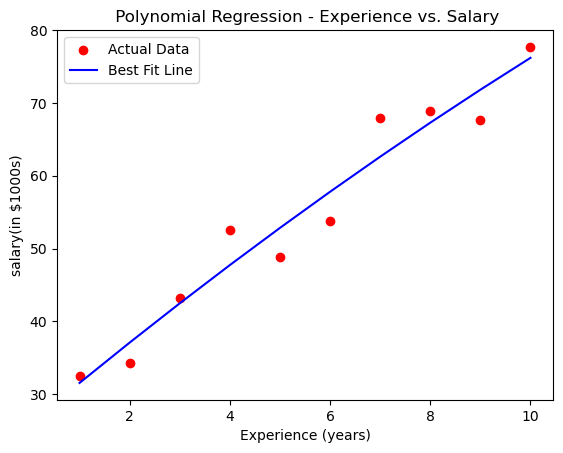

In [13]:
#step 8: plot the actual data points
plt.scatter(X,Y,color='red',label='Actual Data')
# step 9: Plot the Regression line
plt.plot(X,Y_pred,color='blue',label='Best Fit Line')
#step-10 : Add labels and legends
plt.xlabel('Experience (years)')
plt.ylabel('salary(in $1000s)')
plt.title(' Polynomial Regression - Experience vs. Salary')
plt.legend()
plt.show()